<a href="https://colab.research.google.com/github/chuboyo/diabetes-detection/blob/main/binary_classification_with_logisticregression_neuralnet_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/diabetes_prediction_dataset.csv'
df = pd.read_csv(path)

In [ ]:
df.head()
# df.columns


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# categories = ['gender', 'smoking_history', ]
df = pd.get_dummies(df)

In [ ]:
df.head()
# df.columns

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [ ]:
y = df['diabetes']
# y.drop_index()
print(y.head())
x = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current']]
x.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)
df_scaled

array([[ 1.69270354, -0.28443945,  4.93637859, ..., -0.32119822,
         1.35992968, -0.26251249],
       [ 0.53800643, -0.28443945, -0.20257766, ..., -0.32119822,
        -0.73533214, -0.26251249],
       [-0.61669069, -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       ...,
       [ 1.07094356, -0.28443945, -0.20257766, ...,  3.11334224,
        -0.73533214, -0.26251249],
       [-0.7943364 , -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       [ 0.67124071, -0.28443945, -0.20257766, ..., -0.32119822,
        -0.73533214, -0.26251249]])

<ipython-input-24-907ea03b59dd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


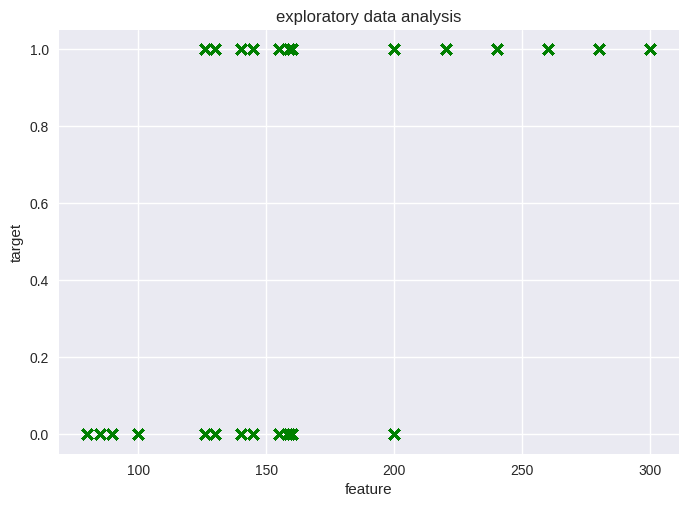

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.scatter(x['blood_glucose_level'], y, c='green', marker='x')
ax.set_title('exploratory data analysis')
ax.set_xlabel('feature')
ax.set_ylabel('target')
plt.show()
# print(x.max())

In [ ]:
x_train, x_, y_train, y_ = train_test_split(df_scaled, y, test_size = 0.4, random_state = 1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size = 0.5, random_state = 1)
print(x_train.shape)
print(y_train.shape)
print(x_cv.shape)
print(y_cv.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 15)
(60000,)
(20000, 15)
(20000,)
(20000, 15)
(20000,)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_cv_pred = model.predict(x_cv)
cv_score = model.score(x_cv, y_cv)
cv_score1 = accuracy_score(y_cv, y_cv_pred)
y_test_pred = model.predict(x_test)
test_score = accuracy_score(y_test, y_test_pred)
print(cv_score)
print(cv_score1)
print(test_score)
print(y_test_pred[:5])

0.96
0.96
0.95675
[0 0 1 0 0]


In [ ]:
model_nn = Sequential([
    Dense(units=10, activation='relu'),
    Dense(units=1)
])

model_nn.compile(
    # optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

model_nn.fit(x_train, y_train, epochs=10)
model_nn.summary()

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2855
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2227
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1932
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1711
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1569
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1470
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1405
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1361
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1329
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1298
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dens

In [ ]:
# x_train = tf.convert_to_tensor(x_train)
predictions = model_nn.predict(x_test)
print(predictions)
predictions = tf.nn.sigmoid(predictions)
print(predictions)
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")
# accuracy = tf.keras.metrics.Accuracy()
# accuracy.update_state(y_train, fx_train)


625/625 [==============================] - 3s 5ms/step
[[-3.06246  ]
 [-2.7250493]
 [-2.7301602]
 ...
 [-6.557958 ]
 [-7.383674 ]
 [-3.92487  ]]
tf.Tensor(
[[0.04468258]
 [0.06151134]
 [0.06121695]
 ...
 [0.00141677]
 [0.00062093]
 [0.0193624 ]], shape=(20000, 1), dtype=float32)
decisions = 
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
yhat = yhat.reshape(1, -1)
y_test = np.array(y_test)
# test_pred_classes = np.argmax(yhat, axis=1)
# print(yhat[-1, -4])
# test_true_classes = np.argmax(y_cv)
# print(y_cv[-4])
test_accuracy = np.mean(yhat == y_test)
print(test_accuracy)

0.95615


In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]
RANDOM_STATE = 55

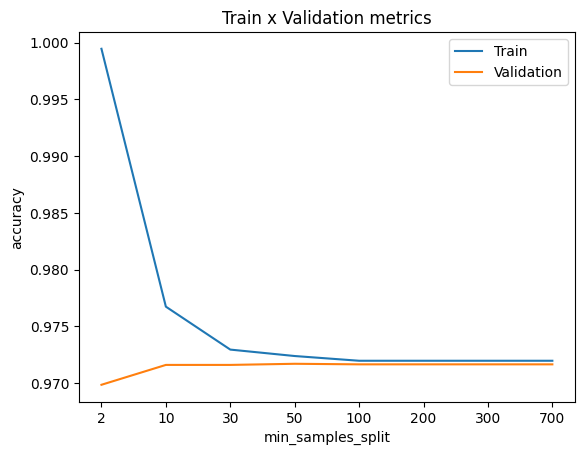

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model_rf = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(x_train,y_train)
    predictions_train = model_rf.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model_rf.predict(x_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
# min_samples_split gets to a sweet spot around 100

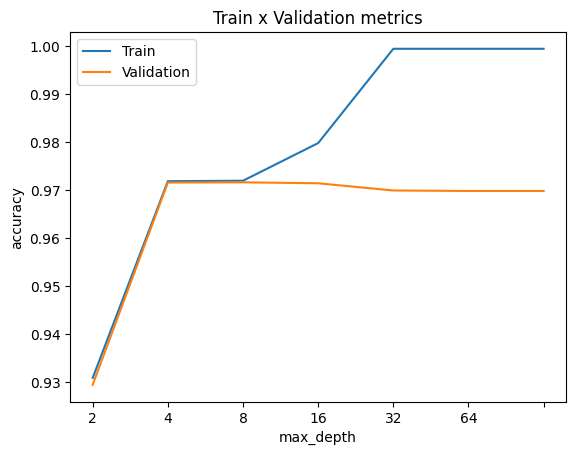

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model_rf = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(x_train,y_train)
    predictions_train = model_rf.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model_rf.predict(x_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
# max_depth hits a sweet spot around 4

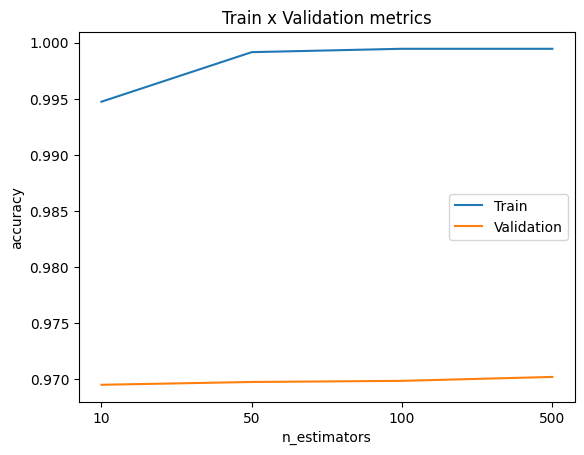

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model_rf = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(x_train,y_train)
    predictions_train = model_rf.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model_rf.predict(x_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
# no of estimators is good at 50

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 4,
                                             min_samples_split = 100).fit(x_train,y_train)
predictions_val = random_forest_model.predict(x_cv)
predictions_test = random_forest_model.predict(x_test)
accuracy_val = accuracy_score(predictions_val,y_cv)
accuracy_test = accuracy_score(predictions_test,y_test)
print(accuracy_val)
print(accuracy_test)

0.971
0.9711
